In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("CloudWatch_Traffic_Web_Attack.csv")
print(df)

     bytes_in  bytes_out         creation_time              end_time  \
0        5602      12990  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
1       30912      18186  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
2       28506      13468  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
3       30546      14278  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
4        6526      13892  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
..        ...        ...                   ...                   ...   
277     41336      13180  2024-04-26T09:50:00Z  2024-04-26T10:00:00Z   
278      3638       3190  2024-04-26T09:50:00Z  2024-04-26T10:00:00Z   
279  25207794    1561220  2024-04-26T09:50:00Z  2024-04-26T10:00:00Z   
280      5736      12114  2024-04-26T09:50:00Z  2024-04-26T10:00:00Z   
281      9032       5862  2024-04-26T09:50:00Z  2024-04-26T10:00:00Z   

              src_ip src_ip_country_code protocol  response.code  dst_port  \
0     147.161.161.82                  AE    HTTPS        

In [7]:
df.head()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule


In [9]:
df.describe()

,bytes_in,bytes_out,response.code,dst_port
count,2.820000e+02,2.820000e+02,282.0,282.0
mean,1.199390e+06,8.455429e+04,200.0,443.0
std,4.149312e+06,2.549279e+05,0.0,0.0
min,4.000000e+01,4.400000e+01,200.0,443.0
25%,5.381500e+03,1.114200e+04,200.0,443.0
50%,1.318200e+04,1.379950e+04,200.0,443.0
75%,3.083300e+04,2.627950e+04,200.0,443.0
max,2.520779e+07,1.561220e+06,200.0,443.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bytes_in             282 non-null    int64 
 1   bytes_out            282 non-null    int64 
 2   creation_time        282 non-null    object
 3   end_time             282 non-null    object
 4   src_ip               282 non-null    object
 5   src_ip_country_code  282 non-null    object
 6   protocol             282 non-null    object
 7   response.code        282 non-null    int64 
 8   dst_port             282 non-null    int64 
 9   dst_ip               282 non-null    object
 10  rule_names           282 non-null    object
 11  observation_name     282 non-null    object
 12  source.meta          282 non-null    object
 13  source.name          282 non-null    object
 14  time                 282 non-null    object
 15  detection_types      282 non-null    object
dtypes: int64

In [11]:
df.isnull().sum()

bytes_in               0
bytes_out              0
creation_time          0
end_time               0
src_ip                 0
src_ip_country_code    0
protocol               0
response.code          0
dst_port               0
dst_ip                 0
rule_names             0
observation_name       0
source.meta            0
source.name            0
time                   0
detection_types        0
dtype: int64

In [12]:
# hear we dont have a null values

In [13]:
ip_counts = df['src_ip'].value_counts() #Step 2: Count number of times each src_ip appears
print("Top 5 IPs by frequency:")
print(ip_counts.head())

Top 5 IPs by frequency:
src_ip
165.225.209.4     29
165.225.26.101    28
155.91.45.242     28
136.226.67.101    28
147.161.131.1     21
Name: count, dtype: int64


In [16]:
mean_requests = ip_counts.mean() #Statistical Analysis
print(mean_requests)
std_requests = ip_counts.std()
print(std_requests)
threshold = mean_requests + 2 * std_requests
print(threshold)

10.071428571428571
9.988617860969894
30.04866429336836


In [17]:
#Identify suspicious IPs
suspicious_ips = ip_counts[ip_counts > threshold]
print("\n🚨 Suspicious IPs:")
print(suspicious_ips)


🚨 Suspicious IPs:
Series([], Name: count, dtype: int64)


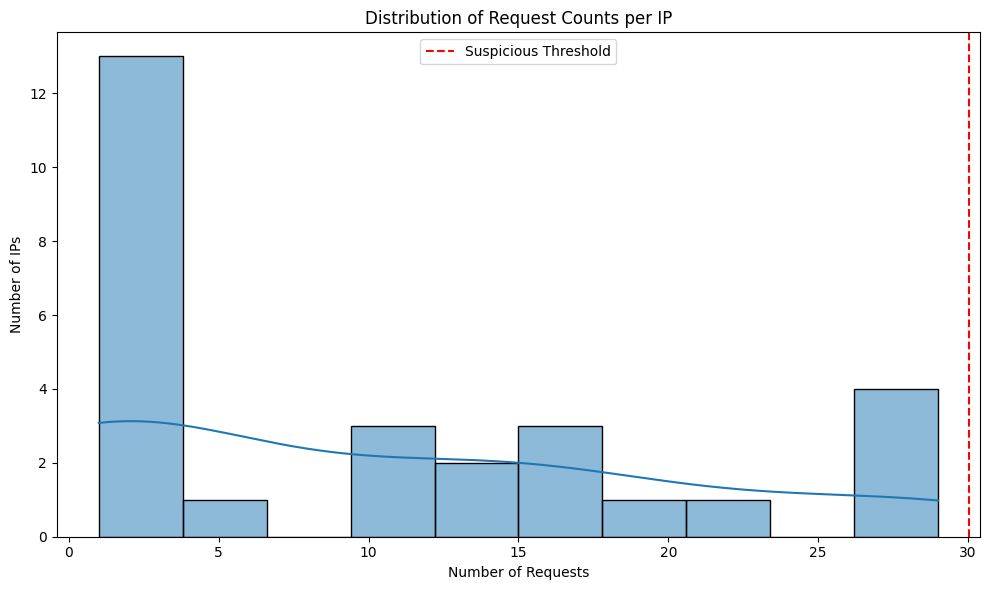

In [20]:
plt.figure(figsize=(10, 6)) #plot distribution
sns.histplot(ip_counts, bins=10, kde=True)
plt.axvline(threshold, color='red', linestyle='--', label='Suspicious Threshold')
plt.title("Distribution of Request Counts per IP")
plt.xlabel("Number of Requests")
plt.ylabel("Number of IPs")
plt.legend()
plt.tight_layout()
plt.savefig("ip_distribution_graph.png")
plt.show()

C:\Users\karishma\AppData\Local\Temp\ipykernel_16160\231403089.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ips.values, y=top_ips.index, palette="viridis")


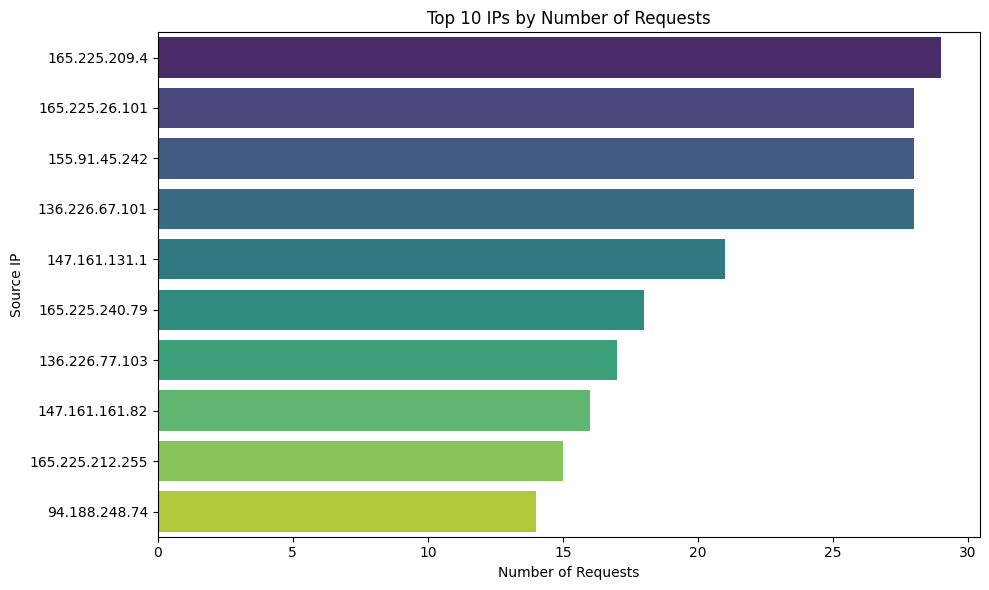

In [21]:
# Top 10 IPs
top_ips = ip_counts.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_ips.values, y=top_ips.index, palette="viridis")
plt.title("Top 10 IPs by Number of Requests")
plt.xlabel("Number of Requests")
plt.ylabel("Source IP")
plt.tight_layout()
plt.savefig("top_10_ips.png")
plt.show()

C:\Users\karishma\AppData\Local\Temp\ipykernel_16160\1466554252.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette="magma")


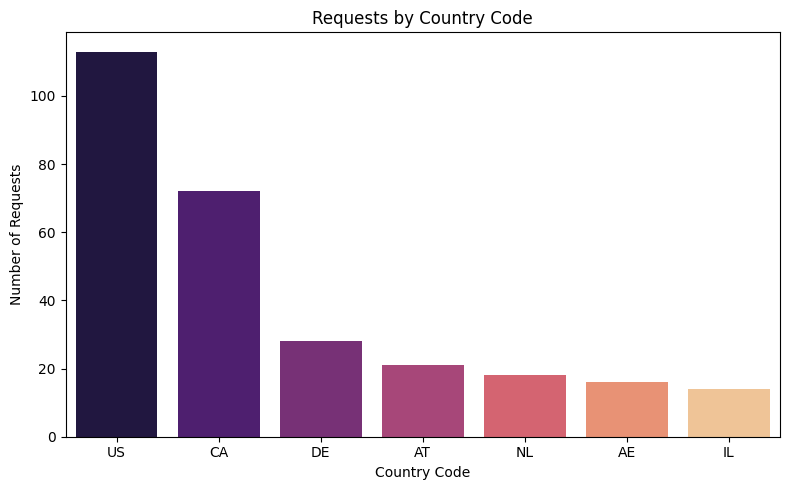

In [22]:
country_counts = df['src_ip_country_code'].value_counts()   # Country frequency

plt.figure(figsize=(8, 5))
sns.barplot(x=country_counts.index, y=country_counts.values, palette="magma")
plt.title("Requests by Country Code")
plt.xlabel("Country Code")
plt.ylabel("Number of Requests")
plt.tight_layout()
plt.savefig("country_wise_requests.png")
plt.show()

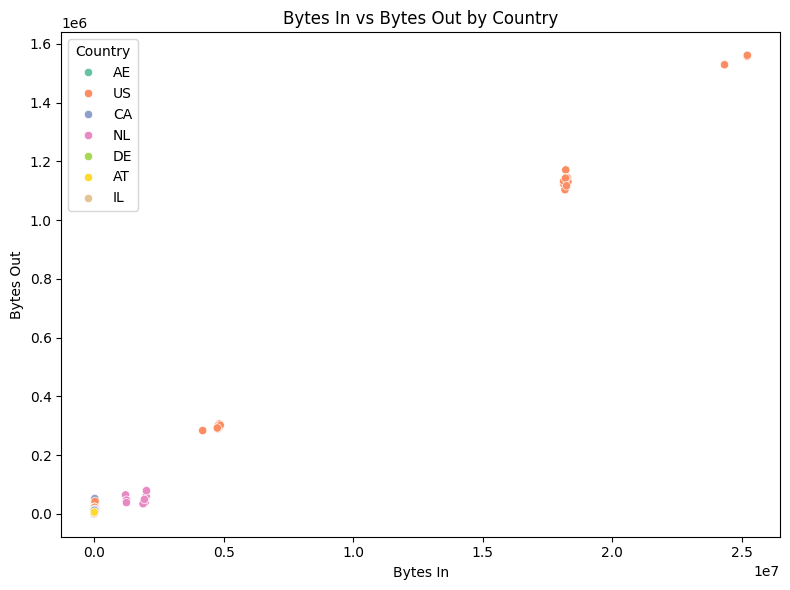

In [23]:
plt.figure(figsize=(8, 6)) #Bytes In vs. Bytes Out (Scatterplot)
sns.scatterplot(data=df, x='bytes_in', y='bytes_out', hue='src_ip_country_code', palette="Set2")
plt.title("Bytes In vs Bytes Out by Country")
plt.xlabel("Bytes In")
plt.ylabel("Bytes Out")
plt.legend(title='Country')
plt.tight_layout()
plt.savefig("bytes_in_vs_out.png")
plt.show()


C:\Users\karishma\AppData\Local\Temp\ipykernel_16160\54687003.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=protocol_counts.index, y=protocol_counts.values, palette="muted")


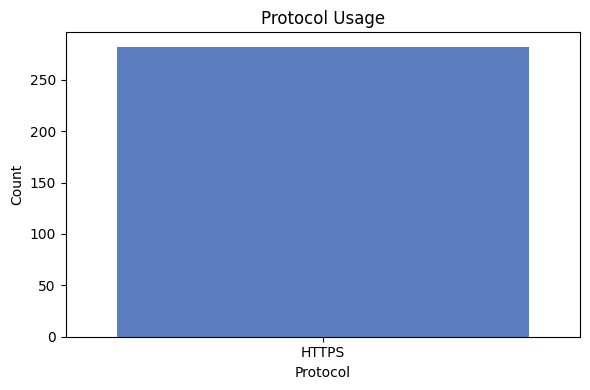

In [24]:
#protocol usabe
protocol_counts = df['protocol'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=protocol_counts.index, y=protocol_counts.values, palette="muted")
plt.title("Protocol Usage")
plt.xlabel("Protocol")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("protocol_usage.png")
plt.show()

In [ ]:
#Graph	                          Use
#Histogram of IP requests	    Suspicious IP detection threshold
#Barplot of Top 10 IPs	        Most time requisting ips
#Country-wise barplot	        Which country the requests are coming from
#Scatterplot (bytes in/out)  	Data transfer behavior analysis